# Machine Learning

1. Load pickle file into dataframe df_drop. Create numpy arrays X (features) and Y (labels) for model training and testing;
2. Train logistic regression model (test size=0.4) and tune the hyperparameter C and penalty method, plot Receiver Operating Characteristics (ROC) curve and calculate the Area Under the Curve (AUC). In this model, AUC=0.8544;
3. Train logistic regression model and make test size=0.25, tune the hyperparameter C and penalty method, plot ROC curve and calculate AUC. In this model, AUC=0.8513;
4. Train LightGBM (a decision tree model), plot ROC and calculate AUC=0.8339;
5. Incorporate LightGBM model into Shap to analyze the features, discovering the influence of each feature for "Churn".
6. To determine which features are carrying useful information for predicting "Churn", I put the most important feature, and then add the second most important feature, and then the third,etc. to train the LightGBM model. By calculating the auc each time, I observe that the auc score keep increasing until feature 3 is added, where the auc plateaus and then decrease subsequentially. I use this as the cut off point (i.e. keep the features before feature 3 and drop the features after feature 3 (including feature 3));
7. To extract more information from the features after feature 3, I use Pricipal Component Analysis (PCA) to transpose these features. Then repeat step 6 except that I add the transposed pca features into the model after the cut off point). As a result, the pca features do not provide additional information to the model because the auc starts declining once I add the fist pca feature into the model. Summarily, only feature 16, 4, 15, 8, 6, 14, 7, 3, 18, 9, 19, 12 provide useful information for predicting "Churn".

In [25]:
!pip install shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import shap
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import pickle
import lightgbm as lgb
from sklearn.decomposition import PCA

In [26]:
infile = open('C:\A\Education\Data Science\Capstone project 1\data_exploration','rb')
df_drop= pickle.load(infile)
infile.close()

In [27]:
# Create arrays for the features and the response variable
y = df_drop['Churn'].values
X = df_drop.drop('Churn', axis=1).values

In [28]:
# logistic regresson model (test size=0.4)

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 20)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier:logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid,cv=5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))



C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

Tuned Logistic Regression Parameter: {'C': 0.12742749857031346, 'penalty': 'l2'}
Tuned Logistic Regression Accuracy: 0.7928994082840237


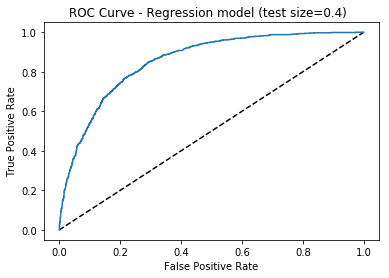

AUC: 0.8544151989990199


In [29]:
#plot ROC curve

# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Regression model (test size=0.4)  ')
plt.show()
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))


In [30]:
# logistic regresson model (test size=0.25)

# Create the hyperparameter grid
c_space = np.logspace(-5, 8, 20)
param_grid = {'C': c_space, 'penalty': ['l1', 'l2']}

# Instantiate the logistic regression classifier:logreg
logreg = LogisticRegression()

# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid,cv=5)

# Fit it to the training data
logreg_cv.fit(X_train,y_train)

# Print the optimal parameters and best score
print("Tuned Logistic Regression Parameter: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Accuracy: {}".format(logreg_cv.best_score_))


C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\A\Program\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  

Tuned Logistic Regression Parameter: {'C': 0.12742749857031346, 'penalty': 'l1'}
Tuned Logistic Regression Accuracy: 0.7998864066641423


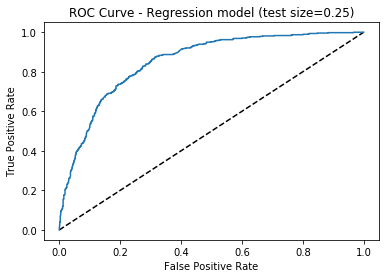

AUC: 0.8513218190523029


In [31]:
# Compute predicted probabilities: y_pred_prob
y_pred_prob = logreg_cv.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Regression model (test size=0.25)')
plt.show()
print("AUC: {}".format(roc_auc_score(y_test, y_pred_prob)))


In [32]:
# train LightGBM model

# convert training data into LightGBM dataset format
d_train = lgb.Dataset(X_train, label=y_train)

# set parameters
params = {}
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'

#train the data
model = lgb.train(params, d_train, 100)

#Prediction
y_pred=model.predict(X_test)


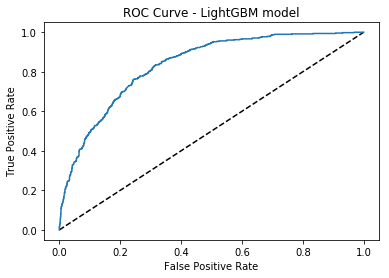

AUC: 0.833990958803279


In [33]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - LightGBM model')
plt.show()
print("AUC: {}".format(roc_auc_score(y_test, y_pred)))


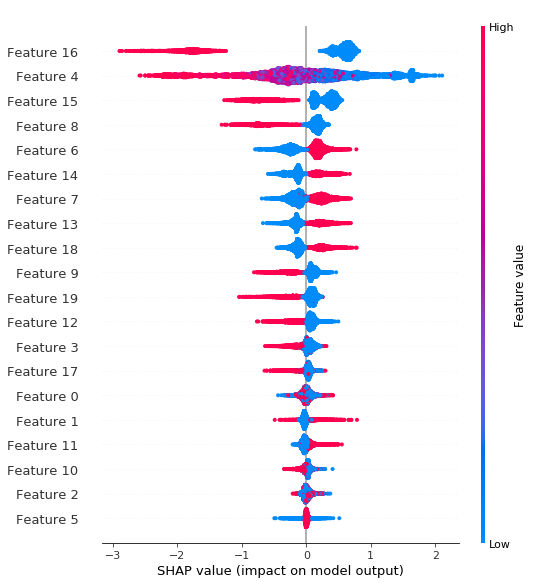

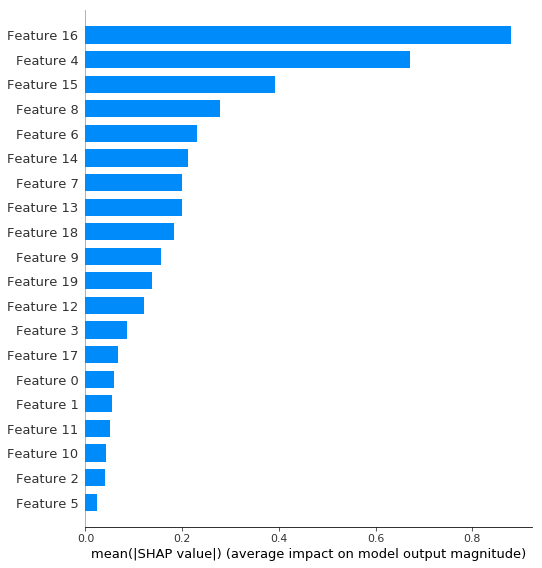

In [34]:
# use the Tree SHAP implementation integrated into Light GBM to explain the entire dataset
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

# summary plot
shap.summary_plot(shap_values, X)

#take the mean absolute value of the SHAP values for each feature to get a standard bar plot:
shap.summary_plot(shap_values, X, plot_type="bar")

In [35]:
#get feature names
columns_name=df_drop.columns.tolist()
#delete column of 'churn'
columns_name.remove('Churn')
#print out index and column names
for index, value in enumerate (columns_name):
    print(index,value)

0 gender
1 SeniorCitizen
2 Partner
3 Dependents
4 tenure
5 PhoneService
6 PaperlessBilling
7 MultipleLines_Yes
8 InternetService_No
9 OnlineSecurity_Yes
10 OnlineBackup_Yes
11 DeviceProtection_Yes
12 TechSupport_Yes
13 StreamingTV_Yes
14 StreamingMovies_Yes
15 Contract_One year
16 Contract_Two year
17 PaymentMethod_Credit card (automatic)
18 PaymentMethod_Electronic check
19 PaymentMethod_Mailed check


In [36]:
# try feature by feature on lightGBM model to test the auc score

feature_rank=[16,4,15,8,6,14,7,3,18,9,19,12,3,17,0,1,11,10,2,5]

for index, value in enumerate(feature_rank):
    X_redu=X[:,feature_rank[0:index+1]]
    
    #split dataset

    X_train, X_test, y_train, y_test = train_test_split(X_redu,y,test_size=0.25,random_state=42)

    # convert training data into LightGBM dataset format
    d_train = lgb.Dataset(X_train, label=y_train)

    # set parameters
    params = {}
    params['boosting_type'] = 'gbdt'
    params['objective'] = 'binary'

    #train the data
    model = lgb.train(params, d_train, 100)

    #Prediction
    y_pred=model.predict(X_test)

    #calculate auc score
    auc=roc_auc_score(y_test, y_pred)
    
    print(feature_rank[0:index+1],'    ', auc)    

[16]      0.6469788854184648
[16, 4]      0.7589158054839938
[16, 4, 15]      0.7815896351929233
[16, 4, 15, 8]      0.8149119492963435
[16, 4, 15, 8, 6]      0.8186256469047906
[16, 4, 15, 8, 6, 14]      0.8207263572380055
[16, 4, 15, 8, 6, 14, 7]      0.8252998804712105
[16, 4, 15, 8, 6, 14, 7, 3]      0.8243496754483959
[16, 4, 15, 8, 6, 14, 7, 3, 18]      0.8312852764632507
[16, 4, 15, 8, 6, 14, 7, 3, 18, 9]      0.8303676405928888
[16, 4, 15, 8, 6, 14, 7, 3, 18, 9, 19]      0.8308651343966076
[16, 4, 15, 8, 6, 14, 7, 3, 18, 9, 19, 12]      0.8327044772813877
[16, 4, 15, 8, 6, 14, 7, 3, 18, 9, 19, 12, 3]      0.8327044772813877
[16, 4, 15, 8, 6, 14, 7, 3, 18, 9, 19, 12, 3, 17]      0.832433339087217
[16, 4, 15, 8, 6, 14, 7, 3, 18, 9, 19, 12, 3, 17, 0]      0.8320856633847817
[16, 4, 15, 8, 6, 14, 7, 3, 18, 9, 19, 12, 3, 17, 0, 1]      0.8331034493989362
[16, 4, 15, 8, 6, 14, 7, 3, 18, 9, 19, 12, 3, 17, 0, 1, 11]      0.8331791726783895
[16, 4, 15, 8, 6, 14, 7, 3, 18, 9, 19, 12, 3, 

In [37]:
#cut off at feature 12, do PCA transform for the rest of the features
feature_rank_pac=[3,17,0,1,11,10,2,5]
X_pca=X[:,feature_rank_pac[0:]]
print(X_pca)

[[0 0 0 ... 1 1 0]
 [0 0 1 ... 0 0 1]
 [0 0 1 ... 1 0 1]
 ...
 [1 0 0 ... 0 1 0]
 [0 0 1 ... 0 1 1]
 [0 0 1 ... 0 0 1]]


In [38]:
pca = PCA(n_components=8)
pca.fit(X_pca)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [39]:
pca_feature=pca.transform(X_pca)
print(pca_feature)

[[ 0.30858664  0.20489946 -0.50140058 ...  0.1375869  -0.44040195
   0.97389249]
 [-0.3760382   0.35668913  0.54836275 ... -0.46960834 -0.05605069
  -0.15499041]
 [-0.38333494  0.35716518  0.51808694 ... -0.18347006 -0.10857545
  -0.11109929]
 ...
 [ 0.40273793 -0.83062169 -0.58674728 ... -0.17417694  0.18144418
   0.92487733]
 [-0.12753612 -0.30919378  0.45379213 ...  0.94647294  0.06780101
  -0.00880818]
 [-0.3760382   0.35668913  0.54836275 ... -0.46960834 -0.05605069
  -0.15499041]]


In [40]:
print(pca.explained_variance_ratio_)

[0.23680398 0.1799267  0.16071618 0.1065815  0.10107896 0.09573314
 0.06368211 0.05547743]


In [41]:
#extract from featuer 16 to feature 12
feature_rank_keep=[16,4,15,8,6,14,7,3,18,9,19,12]
X_keep=X[:,feature_rank_keep[0:]]
print(X_keep)

[[ 0  1  0 ...  0  0  0]
 [ 0 34  1 ...  1  1  0]
 [ 0  2  0 ...  1  1  0]
 ...
 [ 0 11  0 ...  1  0  0]
 [ 0  4  0 ...  0  1  0]
 [ 1 66  0 ...  1  0  1]]


In [42]:
# put X_keep and pca_deature together
X_new=np.concatenate((X_keep, pca_feature), axis=1)
print(X_new)

[[ 0.00000000e+00  1.00000000e+00  0.00000000e+00 ...  1.37586897e-01
  -4.40401951e-01  9.73892495e-01]
 [ 0.00000000e+00  3.40000000e+01  1.00000000e+00 ... -4.69608339e-01
  -5.60506882e-02 -1.54990412e-01]
 [ 0.00000000e+00  2.00000000e+00  0.00000000e+00 ... -1.83470062e-01
  -1.08575450e-01 -1.11099292e-01]
 ...
 [ 0.00000000e+00  1.10000000e+01  0.00000000e+00 ... -1.74176941e-01
   1.81444176e-01  9.24877333e-01]
 [ 0.00000000e+00  4.00000000e+00  0.00000000e+00 ...  9.46472943e-01
   6.78010137e-02 -8.80818455e-03]
 [ 1.00000000e+00  6.60000000e+01  0.00000000e+00 ... -4.69608339e-01
  -5.60506882e-02 -1.54990412e-01]]


In [43]:
# try feature by feature on lightGBM model again to find the best conbination of features which generate the best auc score

number_list=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

feature_rank_new=[16,4,15,8,6,14,7,3,18,9,19,12,'pca1','pca2','pca3','pac4','pca5','pca6','pca7','pca8']

# try feature by feature on lightGBM model for the new features to test the auc score


for index, value in enumerate(number_list):
    X_re=X_new[:,number_list[0:index+1]]
    
    #split dataset

    X_train, X_test, y_train, y_test = train_test_split(X_re,y,test_size=0.25,random_state=42)

    # convert training data into LightGBM dataset format
    d_train = lgb.Dataset(X_train, label=y_train)

    # set parameters
    params = {}
    params['boosting_type'] = 'gbdt'
    params['objective'] = 'binary'

    #train the data
    model = lgb.train(params, d_train, 100)

    #Prediction
    y_pred=model.predict(X_test)

    #calculate auc score
    auc=roc_auc_score(y_test, y_pred)
    
    print(feature_rank_new[0:index+1],'    ', auc)    

[16]      0.6469788854184648
[16, 4]      0.7589158054839938
[16, 4, 15]      0.7815896351929233
[16, 4, 15, 8]      0.8149119492963435
[16, 4, 15, 8, 6]      0.8186256469047906
[16, 4, 15, 8, 6, 14]      0.8207263572380055
[16, 4, 15, 8, 6, 14, 7]      0.8252998804712105
[16, 4, 15, 8, 6, 14, 7, 3]      0.8243496754483959
[16, 4, 15, 8, 6, 14, 7, 3, 18]      0.8312852764632507
[16, 4, 15, 8, 6, 14, 7, 3, 18, 9]      0.8303676405928888
[16, 4, 15, 8, 6, 14, 7, 3, 18, 9, 19]      0.8308651343966076
[16, 4, 15, 8, 6, 14, 7, 3, 18, 9, 19, 12]      0.8327044772813877
[16, 4, 15, 8, 6, 14, 7, 3, 18, 9, 19, 12, 'pca1']      0.8301502415002653
[16, 4, 15, 8, 6, 14, 7, 3, 18, 9, 19, 12, 'pca1', 'pca2']      0.8300338067802462
[16, 4, 15, 8, 6, 14, 7, 3, 18, 9, 19, 12, 'pca1', 'pca2', 'pca3']      0.8262704412143081
[16, 4, 15, 8, 6, 14, 7, 3, 18, 9, 19, 12, 'pca1', 'pca2', 'pca3', 'pac4']      0.8303798540250588
[16, 4, 15, 8, 6, 14, 7, 3, 18, 9, 19, 12, 'pca1', 'pca2', 'pca3', 'pac4', 'pca5']

In [44]:
#create an array for the features which score the best [16, 4, 15, 8, 6, 14, 7, 3, 18, 9, 19, 12]
X_best=X_new[:,[0,1,2,3,4,5,6,7,8,9,10,11]]
print(X_best)

[[ 0.  1.  0. ...  0.  0.  0.]
 [ 0. 34.  1. ...  1.  1.  0.]
 [ 0.  2.  0. ...  1.  1.  0.]
 ...
 [ 0. 11.  0. ...  1.  0.  0.]
 [ 0.  4.  0. ...  0.  1.  0.]
 [ 1. 66.  0. ...  1.  0.  1.]]


In [45]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X_best,y,test_size=0.25,random_state=42)


# train LightGBM model by using the best features conbination
# convert training data into LightGBM dataset format
d_train = lgb.Dataset(X_train, label=y_train)

# set parameters
params = {}
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'

#train the data
model = lgb.train(params, d_train, 100)

#Prediction
y_pred=model.predict(X_test)


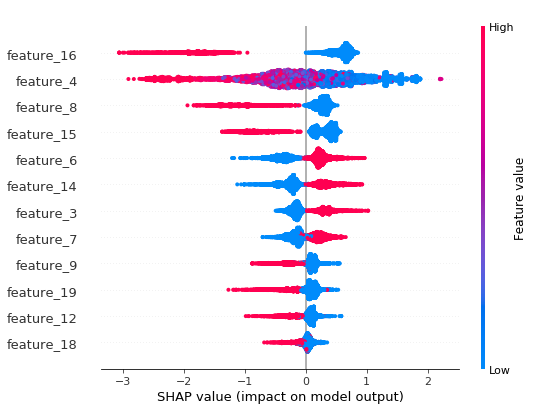

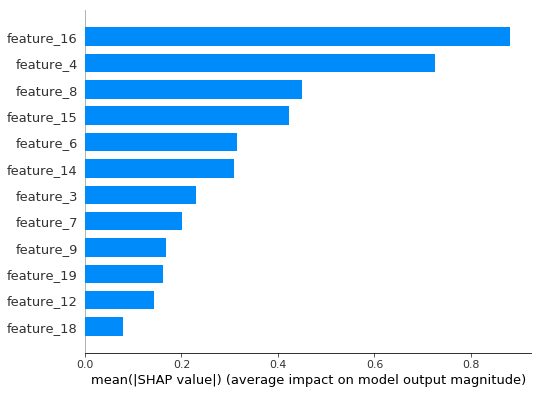

In [46]:
# explain the feature angain by using shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_best)

# summary plot
shap.summary_plot(shap_values, X_best,feature_names=['feature_16','feature_4','feature_15','feature_8','feature_6','feature_14','feature_7','feature_18','feature_3','feature_9','feature_19','feature_12','feature_pca1'])
#take the mean absolute value of the SHAP values for each feature to get a standard bar plot:
shap.summary_plot(shap_values, X_best, plot_type="bar",feature_names=['feature_16','feature_4','feature_15','feature_8','feature_6','feature_14','feature_7','feature_18','feature_3','feature_9','feature_19','feature_12','feature_pca1'])

